Working with exit surveys from employees of the Department of Education, Trainging and Employment (DETE)
and the Technical and Further Education (TAFE) institute in Queensland, Australia. The .csv files can be found
in the data folder.

Goal is to answer these two questions:
Are employees who only worked for the insitutes for a short period of time resigning due to some kind of dissatisfaction? 
    What about employees employees who have been there longer?
Are younger employees resigning due to some kind of dissatisfaction?
    What about older employees?


In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv("./data/dete_survey.csv")
tafe_survey = pd.read_csv("./data/tafe_survey.csv")

In [3]:
# dete_survey.info()
# dete_survey.head()
dete_survey.isnull().sum().sort_values(ascending=False)

# Roughly 822 rows
# Torres Strait and South Sea have over 815 null values, could possibly drop
# Roughly 13 columns have less than 11 values missing, could proxy
# Columns in between that require more cleaning analytics


Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Initiative                               9
Performance

In [4]:
# dete_survey.info()
# dete_survey.head()
tafe_survey.isnull().sum().sort_values(ascending=False).tail(15)

# Roughly 822 rows
# Main Factor. Which of these was the main factor for leaving? col has the most missing values @ 589 followed by 
# InductionInfo. Topic:Did you undertake a Corporate Induction? @ 270
# Roughly 2 columns have less than 11 values missing, could proxy
# Lot of 80s and 90s though

WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job                92
WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work                    92
InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me      92
WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction    91
WorkUnitViews. Topic:23. My job provided sufficient variety                                                91
InstituteViews. Topic:2. I was given access to skills training to help me do my job better                 89
WorkUnitViews. Topic:18. I had sufficient contact with other people in my job                              89
InstituteViews. Topic:7. Management was generally supportive of me                                         88
InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had            87
Induction.

Often cleaning and reshaping is the hardest part
dete_survey contains 'Not Stated' values that indicate values are missing but not represented as NaN
both csv files contain many columns we do not need
each dataframe has the same columns, but column names are different
there are multiple columns/answers that indicate an employee resigned because they were dissatisfied

In [5]:
# Read the dete_survey again but with Not Stated values change NaN
dete_survey = pd.read_csv("./data/dete_survey.csv", na_values="Not Stated")

In [6]:
# Drop columns because they are not relevant to answering our goals
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [7]:
# IDs we would like to use ID, Seapration Type, Cease Date, Dete Start Date, Length of Service, Age, Gender
# make col names lowercase, remove any trailing whitespace, replace spaces with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [8]:
# update the columns in tafe with a rename dictionary
rename_dic = {
    'Record ID': "id", 'CESSATION YEAR': "cease_date", 'Reason for ceasing employment': "separationtype", 'Gender. What is your Gender?': "gender",
    'CurrentAge. Current Age': "age", 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated = tafe_survey_updated.rename(columns = rename_dic)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [9]:
# Looking for survey respondents who resigned, col separationtype col with str "Resignation"
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [10]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [11]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation")].copy()

tafe_survey_updated["separationtype"] = tafe_survey_updated["separationtype"].fillna(False)
# Index 324 has a bunch of NaN values that is breaking the bool mask, so I've decided to drop it
tafe_survey_updated = tafe_survey_updated.drop(axis=0, index=324)
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains("Resignation")].copy()

In [12]:
# Verify that the years in cease_date and dete_start_date make sense
# cease_date shouldn't have dates after it
# dete_start_dete shouldn't contain values before 1940
import re
regex_pat = re.compile(r"[0-9]{2}/")
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.replace(regex_pat, "", regex=True).astype(float)
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [13]:
# dete_start_dete contains no irregularties like 1940 and is a float number
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [14]:
# Cease date contains no irregularities as well, is a float
dete_resignations["cease_date"].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [15]:
# These years look good as well
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

In [16]:
# Length of time an employee spent in a workplace is referred to as their years of service
# tafe_resignations already contains a service column
# dete_resignations.columns
# use cease date and dete_start_date
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
# We need a period of time to discern how long an employee was at the company

In [17]:
# View values in the Dissatisfaction
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [18]:
# Add new column with bools to distinguish if employees were upset
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == "-":
        return False
    else:
        return True
    
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
print(tafe_resignations_up["dissatisfied"].value_counts(dropna=False))

False    241
True      99
Name: dissatisfied, dtype: int64


In [19]:
dete_resignations["dissatisfied"] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
print(dete_resignations_up["dissatisfied"].value_counts(dropna=False))

False    162
True     149
Name: dissatisfied, dtype: int64


In [27]:
# Aggregate data according to the insitute_service
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
# We are going to use a thresh of 500
combined_updated = combined.dropna(thresh=500,axis=1).copy()

In [29]:
# Lets combine the years into categories
# New Less than 3 years at the company
# Experience 3-6 years at the company
# Established 7-10 years at the company
# Veteran 11 or more years at the company
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype("float")
print(combined_updated["institute_service"].value_counts(dropna=False))
print(combined_updated["institute_service_up"].value_counts(dropna=False))

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [30]:
def service_cats(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [31]:
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(service_cats)
combined_updated["service_cat"].head(5)

0    Established
1        Veteran
2    Experienced
3        Veteran
4    Experienced
Name: service_cat, dtype: object

In [32]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

<AxesSubplot:xlabel='service_cat'>

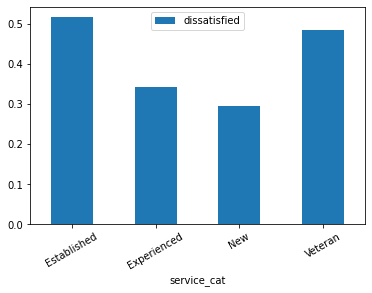

In [33]:
pv_dissatisfied = combined_updated.pivot_table(index="service_cat", values="dissatisfied")
%matplotlib inline
pv_dissatisfied.plot(kind="bar", rot=30)

In [ ]:
# Based on the output, we can see that new employees are actually the least dissatisfied with their jobs